grade: 5/5, great work! 
# Homework 3
## Kathryn Cogert, Due 1/26/15

Scientific American stated in 2009 that the number of bike trips taken by men to the number of bike trips taken by women is a 2:1 ratio. [(Baker, 2009)](http://www.scientificamerican.com/article/getting-more-bicyclists-on-the-road/)  I'm curious what impact this bike sharing program has on that dynamic.  Wouldn't it be cool if easy access to bikes improved female ridership and we were able to hit that magic 1:1 ratio? 
<center><img src=biking.gif></center>

<b>Problem Statement:</b> Among annual Pronto members, How does the gender division in ridership compare to the national average?  I would like to examine this division:
1. Over all of the annual member rides
2. For specific ranges of trip length
3. For specific ranges of rider birth date
4. For specific ranges of trip length & rider birth date.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from ipywidgets import interact
import seaborn
seaborn.set()
seaborn.set_color_codes()

C:\Users\Kathryn\Miniconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


First, I need read the data I need into a dataframe:

In [2]:
trips=pd.read_csv('~/Documents/Coursework/CHEME599/HW/Cogert/data/open_data_year_one/2015_trip_data.csv')
#Set date as index
trips.index = pd.DatetimeIndex(trips['starttime'])

Next, I need to format the data against date. The date time index is so handy, it would be really cool if there was an an easy way to switch between viewing by all the different information packed into the date time stamp.

In [26]:
%matplotlib inline
def gender_by_date(index_by):
    '''
    This function plots average male and female over a user specified time period
    '''
    # Convert the user input to an indexing variable
    if index_by=='date':
        index_by_var=trips.index.date
    elif index_by=='day':
        index_by_var=trips.index.day
    elif index_by=='month':
        index_by_var=trips.index.month
    elif index_by=='hour':
        index_by_var=trips.index.hour
    elif index_by=='day':
        index_by_var=trips.index.day
    elif index_by=='day of week':
        index_by_var=trips.index.weekday
        
    # Make a pivot table
    pivoted=trips.pivot_table('trip_id', aggfunc='count', 
                          index=index_by_var, columns='gender')

    #Plot
    ax=pivoted.plot(title='Ridership by Gender', figsize=(10,7))
    ax.set_xlabel(index_by)
    ax.set_ylabel('# of Trips')


Now let's make this a widget with a drop down menu!

<function __main__.gender_by_date>

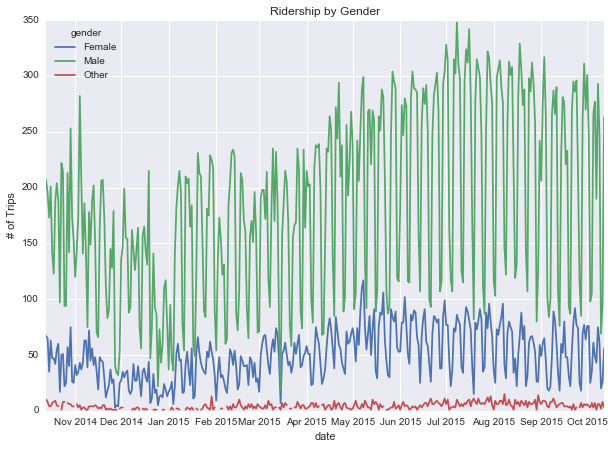

In [29]:
interact(gender_by_date,
         index_by=('date', 'day',
                  'month', 'hour',
                  'day', 'day of week'))

# <b><center>HOLY COW!</center></b>
![title](holycow.gif)

This program is <i>much</i> more popular with men! Even when we consider that 
This is ratio is FAR worse than that.  Really quickly, let's check:

In [30]:
ratio=joined['Male'].sum()/joined['Female'].sum()
ratio.round(2)

NameError: name 'joined' is not defined

# <center>ALMOST 4 MEN TO 1 WOMAN?

I wonder if we can see how this breaks down by trip duration and birth date..  It would be convenient to be able to see how the parameters affect gender break down in some kind of interactive way...

In [31]:
# Lets make sure we're looking at trip length in minutes.
trips['tripminutes']=trips['tripduration']/60


#Then lets define a function that our users will interact with via a widger
def inequality_sucks(trip_length_min,trip_length_max,birth_year_min,birth_year_max):
    '''
    This function plots male and female ridership as a bar graph for a 
    specified range of birth years and trip durations
    '''
    # Given a min and max trip length and birth year, this will modify the trips
    # data frame to select for only the desired trips
    tripsmod=trips[(trips['tripminutes']<trip_length_max)]
    tripsmod=tripsmod[tripsmod['tripminutes']>trip_length_min]
    tripsmod=tripsmod[tripsmod['birthyear']>birth_year_min]
    tripsmod=tripsmod[tripsmod['birthyear']<birth_year_max]
    
    #Once the dataframe has been modified given user defined parameters, we need
    # to group the new dataframe by gender
    gendergroups=tripsmod.groupby('gender')['trip_id'].count()
    
    # It would also be useful for the user to see what the raio of their dataset
    # is, as well as the % of total trips their dataset represents
    genderatio=gendergroups['Male']/gendergroups['Female']
    percenttrips=tripsmod['trip_id'].count()/sum(trips['usertype']=='Annual Member')
    
    # Then let's show them what they've got!
    print('Gender Ratio='+ str(genderatio.round(1)))
    print('% of Total Trips='+str(percenttrips.round(1)))
    gendergroups.plot.pie(figsize=(6,6))
    


Finally, lets turn our fancy function into an interactive widget!

Gender Ratio=1.7
% of Total Trips=0.0


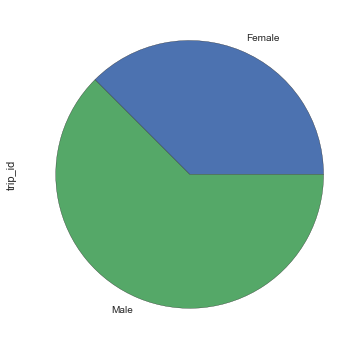

In [32]:
abs_trip_min=trips['tripminutes'].min()
abs_trip_max=trips['tripminutes'].max()
abs_birth_min=trips['birthyear'].min()
abs_birth_max=trips['birthyear'].max()
abs_trip_min=abs_trip_min.round(1)
abs_trip_max=abs_trip_max.round(1)
interact(inequality_sucks,
        trip_length_min=(abs_trip_min, abs_trip_max/2),
        trip_length_max=(abs_trip_min*2, abs_trip_max),
        birth_year_min=(abs_birth_min, abs_birth_max-5),
        birth_year_max=(abs_birth_min+5, abs_birth_max));  

So in summary, Pronto might want to look into how it could expand it's ridership to women.  Maybe the bikes are sized primarily for men, or maybe the bulk of the annual users work in tech, an industry dominated by men, or maybe it's something else entirely.  Either way, you could do better Pronto!

# Becoming a Super Sailor Scout in Python
## Help Functionality, Shortcuts, and Magic Commands!
![title](sailormoon.gif)

Putting the above together took a lot of time, but it would have been completely impossible without the help the the '?' command and the '??' command to see source code while debugging especially tricky errors.  I also saved <i>So Much</i> time with the notebook shortcuts!  It was my goal to try to complete a notebook without touching my mouse.  Ok, so maybe I used my mouse a few times.  Old habits die hard!  But, by reviewing the shortcut menu regularly, I was able to spend a lot less time going back and forth.  My goal is <u>STILL</u> to make through a whole assignment without touching my mouse.  The magic commands were of course very important when plotting so that I could generate my plots here in the notebook.  Finally, I didn't explore a lot of shell commands, but I'm excited to do so in future!